# <center> Phase 1 Project: Microsoft Move Studio <center>
   <center>  By: Anat Jacobson, Keanan Ginell and Max Ross

# <font color='red'> Introduction and Business Case:
Microsoft’s is starting a new film studio and they need 3 actionable insights to ensure this new studio is a success. The stakeholders of this project include: Microsoft has a global customer base and the market competitors are US based studios.  To increase the profitability of Microsoft Studio, we identified 3 key insights that can improve the odds of producing profitable movies. The analysis you will see below is based on various datasets where we define profitability of as having higher worldwide gross revenue. Our conclusions after the below analysis include identifying: 
1. What is the best month to release films
2. What are the top performing genres
3. What is the best production budget size

    
    
    
    

# <font color='red'> Data Exploration and Analysis:

##  <font color='blue'> 1. Import All Packages Needed

In [336]:
#We are importing all the necessary packages here for our code to all run successfully
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import linregress
from sklearn.datasets import load_iris
from matplotlib.ticker import StrMethodFormatter, FuncFormatter
import statistics as stat
from matplotlib.ticker import StrMethodFormatter, FuncFormatter




## <font color='blue'> 2. Import CSVs, SQL Database, Clean and Merge all
- Datasets from IMDB and the Numbers
- All data has been given from Flatiron School

## 2.1 Movie budgets

In [337]:
#importing movie budges csv
movie_budgets= pd.read_csv('Data/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [338]:
#checking the shape of this CSV
movie_budgets.shape

(5782, 6)

In [339]:
#checking number of unique titles in df
movie_budgets['movie'].nunique() 

5698

## 2.2 Merging SQL

In [340]:
#create connection
con = sqlite3.connect('Data/im.db')

In [341]:
#creating dataframe movie_ratings from movie ratings table in database
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings

""", con)

movie_ratings.head(15) 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [342]:
#creating dataframe movie_basics from movie_basics table in database
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics

""", con)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [343]:
#creating dataframe movie_akas from movie_akas table in database
movie_akas = pd.read_sql("""
SELECT movie_id, title
FROM movie_akas
WHERE region = 'US'
Group by movie_id
""", con)


### Now we have data frames: movie_akas and movie_basics  and will be merging the 2 dataframes to one merged dataset imdb_merged

In [344]:
#Merging the akas dtafroma with movie_basics on an inner join on the unique identier "movie_id"
akas_basics_merge = movie_akas.merge(movie_basics, on='movie_id',
                                        how='inner')

In [345]:
akas_basics_merge

,movie_id,title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
1,tt0112502,Bigfoot,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary
3,tt0192528,Heaven & Hell,Heaven & Hell,Reverse Heaven,2018,104.0,Drama
4,tt0230212,The Final Journey,The Final Journey,The Final Journey,2010,120.0,Drama
...,...,...,...,...,...,...,...
47428,tt9837530,Monkey King Reloaded,Monkey King Reloaded,Monkey King Reloaded,2017,77.0,Adventure
47429,tt9845398,End of the Century,End of the Century,Fin de siglo,2019,84.0,Drama
47430,tt9875852,The House Elf,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy"
47431,tt9882084,Chasing Happiness,Chasing Happiness,Chasing Happiness,2019,96.0,Documentary


In [346]:
#creating a merged full dataset from the SQL imdb databse. 
imdb_merged = akas_basics_merge.merge(movie_ratings, on='movie_id',
                                       how='left')

In [347]:
imdb_merged.shape #Checking the shape

(47433, 9)

##  2.3 Creating Joined Data Table for All</font>

### Cleaning up data frames to properly join!
- Below we will be removing unnecessary columns: language, types, attributes
- Cleaning up date columns for proper joins later on
- Removing duplicates we come across

<font color='blue'> Movie Budgets Table Cleanup </font>

In [348]:
#renaming movie title for ease of joining

movie_budgets.rename(columns = {'movie': 'title'}, inplace = True) 

In [349]:
movie_budgets.loc[movie_budgets['title'] == 'Aladdin'] 
#see here that there are 2 aladdins but they are from 2 seperate years
#this will be an issue for when we merge if we dont merge by year + title match

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
80,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"


In [350]:
##need to merge on 2 columns i.e. start year and title column bc dupe movies diff years. 

In [351]:
#Creating new coumn called year that is date.time
movie_budgets['Release_Date_Time'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets['Year'] = movie_budgets['Release_Date_Time'].dt.year

In [352]:
movie_budgets['month'] = movie_budgets['Release_Date_Time'].dt.month

In [353]:
movie_budgets.info() #checking new column and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   object        
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   Release_Date_Time  5782 non-null   datetime64[ns]
 7   Year               5782 non-null   int64         
 8   month              5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 406.7+ KB


In [354]:
##taking sql_df_US, movie_budgets, movies and creating one table

full_movies_df = imdb_merged.merge(movie_budgets, left_on= ['primary_title', 'start_year'],right_on= ['title', 'Year'], how= 'inner')


In [355]:
full_movies_df.shape

(1340, 18)

In [356]:
full_movies_df

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",2012-12-31,2012,12
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",2013-12-25,2013,12
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",2014-09-19,2014,9
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015-06-12,2015,6
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",2011-10-28,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",Happy Death Day 2U,"$9,000,000","$28,051,045","$64,179,495",2019-02-13,2019,2
1336,tt8266310,Blinded by the Light,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,2019-08-14,2019,8
1337,tt8364368,Crawl,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,16,"Jul 12, 2019",Crawl,"$17,000,000",$0,$0,2019-07-12,2019,7
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",2018-09-21,2018,9


---

# <font color='blue'> 3. Individual Analyses
 Now that we have cleaned our data and gotten to one joined dataset we dug more into this data frame and preformed three unique anaylysis as seen below. The analysis shown will be:
    
    1. Month Release (3.1)
    2. Genre (3.2) 
    3. Production Budget (3.3)

# 3.1 Month Release
- Looking into the affect the release month has on the profit for each movie

In [357]:
#renaming the full movies dataframe to not conflict with the other hypethsis data frames
movies = full_movies_df 

In [358]:
#cleaning up 3 columns: worldwide_gross, production budget, domestic gross
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
movies['production_budget'] = movies['production_budget'].str.replace('$','').str.replace(',','').astype(float)
movies['domestic_gross'] = movies['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

In [359]:
movies.drop('title_y', axis = 1, inplace = True)
movies.drop('Year', axis = 1, inplace = True)
movies.drop('release_date', axis = 1, inplace = True)
movies.drop('id', axis = 1, inplace = True)

In [360]:
#movies_profit['profit'].map("{:,.0f}".format)
movies['gross_formatted']= '$'+ movies['worldwide_gross'].map('{:,.0f}'.format)
movies

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,month,gross_formatted
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,45000000.0,0.0,7.370600e+04,2012-12-31,12,"$73,706"
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,91000000.0,58236838.0,1.878612e+08,2013-12-25,12,"$187,861,183"
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,28000000.0,26017685.0,6.210859e+07,2014-09-19,9,"$62,108,587"
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,215000000.0,652270625.0,1.648855e+09,2015-06-12,6,"$1,648,854,864"
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,45000000.0,13109815.0,2.154473e+07,2011-10-28,10,"$21,544,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,9000000.0,28051045.0,6.417950e+07,2019-02-13,2,"$64,179,495"
1336,tt8266310,Blinded by the Light,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,15000000.0,0.0,0.000000e+00,2019-08-14,8,$0
1337,tt8364368,Crawl,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,17000000.0,0.0,0.000000e+00,2019-07-12,7,$0
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,5000000.0,6352306.0,6.653715e+06,2018-09-21,9,"$6,653,715"


##  Plotting Gross Per Movie Per Month 

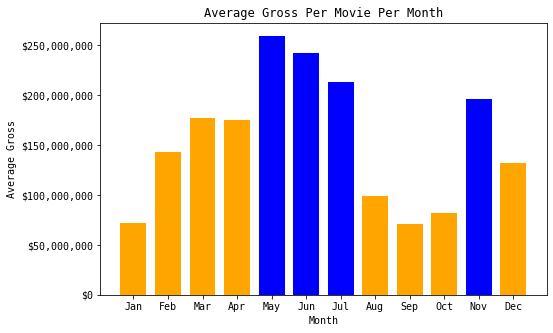

In [361]:

month_gross = movies.groupby(movies.month)['worldwide_gross'].mean()
y = month_gross.values.tolist()
x = month_gross.index.tolist()
# Now, let's plot two variables from the iris dataset
bar_chart_title = 'Average Gross Per Movie Per Month'
bar_chart_y_label = 'Average Gross'
bar_chart_x_label = 'Month'

fig, ax = plt.subplots(figsize=(8, 5))


ax.bar(x=x, height= y, width=0.75, 
       color= ('orange', 'orange', 'orange', 'orange', 'blue', 
               'blue', 'blue', 'orange', 'orange', 'orange','blue'), 
       tick_label=("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                 "Aug", "Sep", "Oct", "Nov", "Dec"))
       

plt.title(bar_chart_title)
ax.set_xlabel(bar_chart_x_label)
ax.set_ylabel(bar_chart_y_label);
ax.ticklabel_format(axis = 'y', style= 'plain' )
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'));



### Key takeaways:
- Highest average gross is in the summer months (May - July) and November
- All ages of school are off in the summer which means more downtime and need to get out and do something (i.e. like seeing a movie)
- Presumably the reason for dip in August is due to most people going on vacation during the august month. Aditionally, in more western parts of the US school begins again as easy as august which would lead to a drop.
- November sees a high gross as well since this is when Award show season begins to close and often the movies loking to receive awards try to be released at the end of the season so that they are at the top of peoples minds
    - This also correlates with why January is such a low Worldwide Gross because the great movies do not want to   be released in the beginning of the year and then be forgotten abouts 


### Diving in a bit deeper
- Digging into analysis of average gross per movie per month per year in order to see if there can be takeaways from here as well
- The graph below shows average gross per movie per year

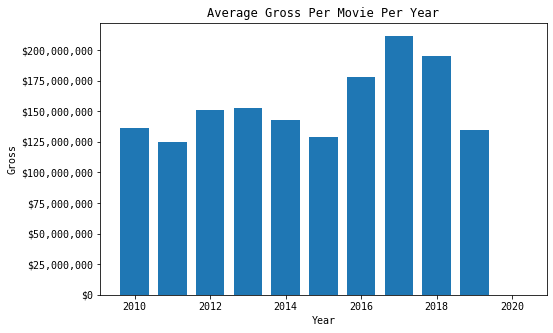

In [362]:
#graph below showing average gross per movie per year
year_gross = movies.groupby(movies.start_year)['worldwide_gross'].mean()

y = year_gross.values.tolist()
x = year_gross.index.tolist()
# Now, let's plotting the two variables 
bar_chart_title = 'Average Gross Per Movie Per Year'
bar_chart_y_label = 'Gross'
bar_chart_x_label = 'Year'

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x=x, height= y, width=0.75)
       

plt.title(bar_chart_title)
ax.set_xlabel(bar_chart_x_label)
ax.set_ylabel(bar_chart_y_label);

#formatting the ticks
ax.ticklabel_format(axis = 'y', style= 'plain', )
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


In [363]:
#creating a new data table specifically for the analysis of looking at average gross per movie per month per year 

grouped_df = movies.groupby(['month','start_year']).agg({'worldwide_gross': 'mean'})
grouped_df


worldwide_gross
month start_year                 
1     2010           7.386000e+07
      2011           1.189247e+08
      2012           6.125140e+07
      2013           6.089032e+07
      2014           8.553710e+07
...                           ...
12    2015           7.391002e+07
      2016           1.888847e+08
      2017           1.820814e+08
      2018           1.790776e+08
      2019           0.000000e+00

[120 rows x 1 columns]

In [364]:
#resetting the index in order to create the month column and be able to create a unique agregate column
#in the next cell block 

grouped_df.reset_index(inplace = True) 

In [365]:
grouped_df['year_month'] = grouped_df['start_year'].astype(str) + "-" + grouped_df['month'].astype(str)

In [366]:
grouped_df #showing what is in dataset grouped d_f

,month,start_year,worldwide_gross,year_month
0,1,2010,7.386000e+07,2010-1
1,1,2011,1.189247e+08,2011-1
2,1,2012,6.125140e+07,2012-1
3,1,2013,6.089032e+07,2013-1
4,1,2014,8.553710e+07,2014-1
...,...,...,...,...
115,12,2015,7.391002e+07,2015-12
116,12,2016,1.888847e+08,2016-12
117,12,2017,1.820814e+08,2017-12
118,12,2018,1.790776e+08,2018-12


In [367]:
#creating indvidual variables in order to create line chart for better visualization
y2010 = grouped_df.loc[grouped_df['start_year'] == 2010]
y2011 = grouped_df.loc[grouped_df['start_year'] == 2011]
y2012 = grouped_df.loc[grouped_df['start_year'] == 2012]
y2013 = grouped_df.loc[grouped_df['start_year'] == 2013]
y2014 = grouped_df.loc[grouped_df['start_year'] == 2014]
y2015 = grouped_df.loc[grouped_df['start_year'] == 2015]
y2016 = grouped_df.loc[grouped_df['start_year'] == 2016]
y2017 = grouped_df.loc[grouped_df['start_year'] == 2017]
y2018 = grouped_df.loc[grouped_df['start_year'] == 2018]
y2019 = grouped_df.loc[grouped_df['start_year'] == 2019]


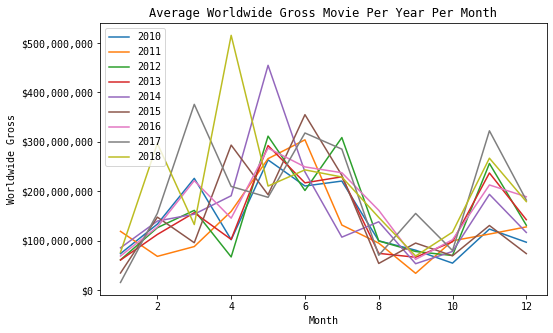

In [368]:
#creating line chart
fig,ax = plt.subplots(figsize=(8, 5))
ax.plot(y2010['month'], y2010['worldwide_gross'])
ax.plot(y2011['month'], y2011['worldwide_gross'])
ax.plot(y2012['month'], y2012['worldwide_gross'])
ax.plot(y2013['month'], y2013['worldwide_gross'])
ax.plot(y2014['month'], y2014['worldwide_gross'])
ax.plot(y2015['month'], y2015['worldwide_gross'])
ax.plot(y2016['month'], y2016['worldwide_gross'])
ax.plot(y2017['month'], y2017['worldwide_gross'])
ax.plot(y2018['month'], y2018['worldwide_gross'])
#ax.plot(y2019['month'], y2019['worldwide_gross']) 

#formatting tick labels
ax.ticklabel_format(axis = 'y', style= 'plain' )
#plt.xticks(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                 #"Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Average Worldwide Gross Movie Per Year Per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Worldwide Gross");

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


#adding in index
ax.legend(["2010","2011","2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]);

### Another way to visualize each individual year per month movie average:
- This way is very clunky and therefore deemed it not usable

In [369]:
x= grouped_df['year_month']

<BarContainer object of 120 artists>

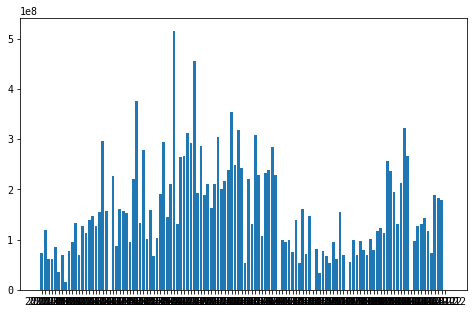

In [370]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x= x, height = grouped_df['worldwide_gross'])

After analyzing the above graphs, it is clear that the optimal time to release movies is summer months or November. We next looked at Genre trends to see if there is a best category to produce, once realeasing in the given timeframe. 

---

# 3.2 Genre Trends
- Looking into whether seperate Genre's see higher profitability

In [371]:
#converting dataset to SQL to filter/drop columns easily
full_movies_Max = full_movies_df.to_sql('genres', con, if_exists='replace', index = False)

In [372]:
#Using tables that are unique and useful
full_movies = pd.read_sql('''
SELECT movie_id, primary_title, genres, start_year, runtime_minutes,
        averagerating, numvotes, production_budget, worldwide_gross
FROM genres 
''', con)

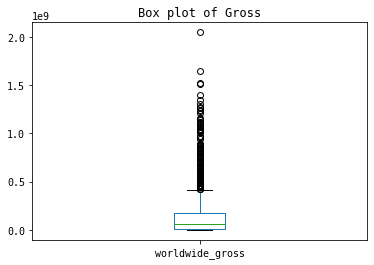

In [373]:
#boxplot of 'worldwide_gross' to find the best measure of central tendency
full_movies["worldwide_gross"].plot(kind="box", title="Box plot of Gross")
plt.show()

In [374]:
full_movies['genres'].value_counts()

Adventure,Animation,Comedy    65
Action,Adventure,Sci-Fi       52
Comedy                        51
Comedy,Drama,Romance          49
Drama                         49
                              ..
Drama,Music,Musical            1
Action,Biography,Comedy        1
Fantasy,Horror,Thriller        1
Biography,Documentary          1
Adventure,Comedy,Music         1
Name: genres, Length: 217, dtype: int64

# Splitting genres column to isolate individual genres

In order to get a better picture of how genre effects worldwide gross I needed to isolate individual genres so that I could apply a central tendancy to the 'worldwide_gross' of
each genre and plot the results to show the average best performing genres.

The plot shows that Animation, Adventure, and Sci-FI are, on average, the highest performing
genres and will typically generate the highest revenue. This does not show the whole picture for genres. To understand the actual highest performing genres we have to look at the genres that
have combinations of these three genres.

So knowing what the top 3 performing genres are I filtered our data set to show the, full genres
(movies use multiple genres to define they're move). Doing this I found that the top 3 full
genres for worldwide gross revenue is 



In [375]:
# spliting the genres column up so that each movie has an entry for each genre listed

genres = (full_movies.genres.str.split(',', expand=True)
            .stack()
            .to_frame(name='genres'))

genres.index = genres.index.droplevel(1)


In [376]:
# creating a new df by merging new columns back on the data set grouped by the median based off of box plot
genre_gross = (genres.join(full_movies.loc[:,['worldwide_gross']]).groupby('genres').median().sort_values('worldwide_gross', ascending=False))

In [377]:
#adding an index to new df because I don't know how to graph using the index as the x-axis
genre_gross_df = genre_gross.reset_index()

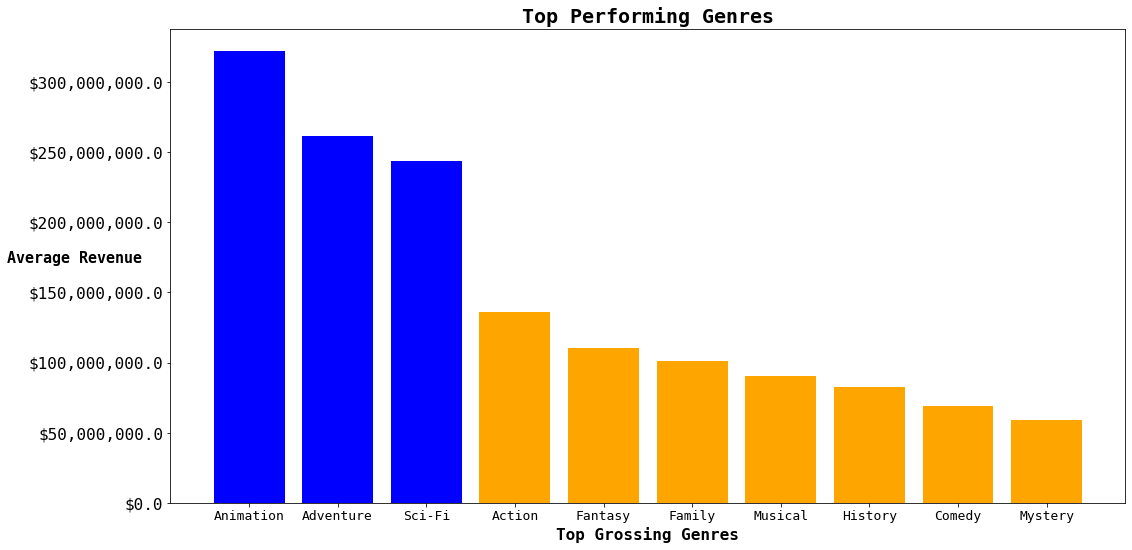

In [378]:
plt.rcParams['font.family'] = 'monospace'

x = genre_gross_df['genres'].head(10)
height= genre_gross_df['worldwide_gross'].head(10)
fig, ax = plt.subplots(figsize=(16,8))


color=['blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
ax.bar(x=x, height=height, color=color)


plt.title("Top Performing Genres", fontsize=20, loc='center', weight='bold')
ax.set_xlabel('Top Grossing Genres', fontsize=16, weight='bold')

ax.set_ylabel('Average Revenue', fontsize=15, rotation=360, weight='bold', loc='center')
ax.ticklabel_format(style='plain', axis='y')

ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', labelsize=13)

ax.yaxis.set_label_coords(-0.1, 0.5)
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))

plt.tight_layout(pad = 2.0)
plt.savefig('top_genres.jpg', dpi=400)

In [379]:
top_genres = pd.read_sql('''
SELECT primary_title, movie_id, production_budget, worldwide_gross, month, genres
FROM genres
WHERE genres LIKE '%Animation%' OR genres LIKE '%Adventure%' OR genres LIKE '%Sci-FI%'
ORDER BY worldwide_gross desc
''', con)
top_genres.loc[:,['genres']].value_counts()

genres                    
Adventure,Animation,Comedy    65
Action,Adventure,Sci-Fi       52
Action,Adventure,Fantasy      31
Action,Adventure,Drama        25
Action,Adventure,Comedy       20
                              ..
Adventure,Drama,History        1
Romance,Sci-Fi,Thriller        1
Adventure,Comedy,Sci-Fi        1
Adventure,Comedy,Romance       1
Action,Adventure               1
Length: 67, dtype: int64

In [380]:
top_genres.loc[:,['genres']].head(10)

,genres
0,"Action,Adventure,Sci-Fi"
1,"Action,Adventure,Sci-Fi"
2,"Action,Adventure,Sci-Fi"
3,"Action,Adventure,Sci-Fi"
4,"Action,Adventure,Sci-Fi"
5,"Action,Adventure,Sci-Fi"
6,"Adventure,Animation,Comedy"
7,"Action,Adventure,Animation"
8,"Action,Adventure,Sci-Fi"
9,"Adventure,Animation,Comedy"


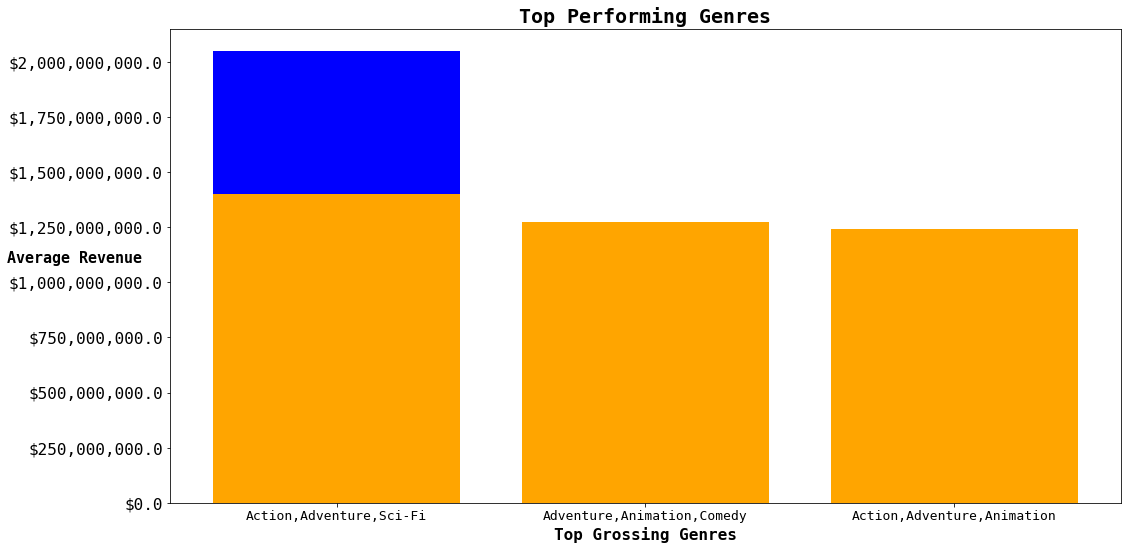

In [381]:
plt.rcParams['font.family'] = 'monospace'

x = top_genres['genres'].head(10)
height= top_genres['worldwide_gross'].head(10)
fig, ax = plt.subplots(figsize=(16,8))


color=['blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
ax.bar(x=x, height=height, color=color)


plt.title("Top Performing Genres", fontsize=20, loc='center', weight='bold')
ax.set_xlabel('Top Grossing Genres', fontsize=16, weight='bold')

ax.set_ylabel('Average Revenue', fontsize=15, rotation=360, weight='bold', loc='center')
ax.ticklabel_format(style='plain', axis='y')

ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', labelsize=13)

ax.yaxis.set_label_coords(-0.1, 0.5)
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))

plt.tight_layout(pad = 2.0)
plt.savefig('top_genres.jpg', dpi=400)

In [382]:
top_genres.head()

,primary_title,movie_id,production_budget,worldwide_gross,month,genres
0,Avengers: Infinity War,tt4154756,300000000.0,2.048134e+09,4,"Action,Adventure,Sci-Fi"
1,Jurassic World,tt0369610,215000000.0,1.648855e+09,6,"Action,Adventure,Sci-Fi"
2,The Avengers,tt0848228,225000000.0,1.517936e+09,5,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,tt2395427,330600000.0,1.403014e+09,5,"Action,Adventure,Sci-Fi"
4,Black Panther,tt1825683,200000000.0,1.348258e+09,2,"Action,Adventure,Sci-Fi"


We next looked at Productions trends to see if there is a best budget to give to produce, once realeasing in the given timeframe and Genre

---

# 3.3 Production Budget

## Droping excess columns
- All movies are already in US region and for that reason I am dropping region
- I am removing extra title columns
- Release date, start year not needed for my analysis 

In [ ]:
full_movies_K = full_movies_df.drop(labels =['start_year','Release_Date_Time'] , axis = 1)

In [ ]:
# Check columns dtype
full_movies_K['worldwide_gross'].dtype

<font color='red'>Make new Df where gross and budget has no zeroes

In [ ]:
full_movies_profit_df = full_movies_K.loc[full_movies_df['production_budget']!= 0].loc[full_movies__K['worldwide_gross']!=0]
full_movies_profit_df

<font color='red'>Create profit column

In [ ]:
full_movies_profit_df['profit'] = full_movies_profit_df['worldwide_gross'] - full_movies_profit_df['production_budget']


<font color='red'>Create profit_margin column

In [ ]:
full_movies_profit_df['profit_margin'] = (full_movies_profit_df['profit'] / full_movies_profit_df['worldwide_gross']) * 100


In [ ]:
full_movies_profit_df.shape

In [ ]:
full_movies_profit_df.info()

## Note on Profit and Profit Margin 
Profit and profit margin were both calculated in this however it is in accurate and misleading. Production Budget represents the budget allocated for filming. This can be exceed and while this is rare the greater issue is that production budget does not include additional expenses. These can be costs to show movie in theaters, marketing, promotion. The Numbers has estimated these expenses to be in the hundreds of millions for large budget films like Frozen. All charts and plots using profit and profit margin were removed if used in a misleading context.

## <font color='blue'> Ploting production budget to worldwide gross revenue
This plot shows a scatter plot between production budget and worldwide gross revenue.

In [ ]:
y = full_movies_profit_df['production_budget']
x = full_movies_profit_df['worldwide_gross']
fig, ax = plt.subplots(figsize=(15,8))


ax.scatter(x,y,alpha=0.5)


ax.set_xlabel("Worldwide Gross Revenue ($)")
ax.set_ylabel("Production Budget ($)")
ax.set_title("Production Budget vs. Worldwide Gross Revenue ");
# Removing scientific notation
ax.ticklabel_format(useOffset=False, style='plain')

# Set the major formatter and use fstring notation to adjust the axes
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

slope, intercept, r, p, se = linregress(x,y)
lin_r = linregress(x, y)
plt.plot(x, lin_r.intercept + lin_r.slope*x, 'r')

print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)
plt.savefig('./Keanan_plots/budget_wwgross_scatter.png', dpi=100)

## Creating bins and finding mean of each bin

I created 5 bins that represent the 25th to 75th quintile. The 6th bin are outliers and includes the majority of the movies and doesn't skew the data. The reason for using 5 bins is due to the impact of outliers on a bin if bin size was reduced and number of bins increased. Each bin represents a budget range. The plot shows that mean production budget increases at a relativly linear rate. While mean worldwide gross revenue increases at more of a exponential rate. The relatinoship of this means that highe rbudgets ismorelikley to yield higher worldwide gross revenues. Based on this Microsoft should aim for a production budget greater then 65 million. 

In [ ]:
q1 = np.percentile(full_movies_profit_df["production_budget"],25)
q3 = np.percentile(full_movies_profit_df["production_budget"],75)
iqr = q3 - q1

bin_width = iqr / 5
# make array of bin edges, start = q1, stop = q3 +1 , count by bin_width)
bin_edge = np.arange(q1, q3+1, bin_width)

# .cut to make bins
full_movies_profit_df['budget_range'] = pd.cut(full_movies_profit_df['production_budget'], bins= bin_edge)

# casting budget_range as str
full_movies_profit_df['budget_range'] = full_movies_profit_df['budget_range'].astype(str)


# Creating new DF using groupby and agg
grouped_full_movies_profit_df = full_movies_profit_df.groupby('budget_range').agg(
    {'worldwide_gross': 'mean', 
     'production_budget': 'mean'}).reset_index()

# adjust fig size
fig, ax = plt.subplots(figsize=(15,8))

#creating stacked bar
ax.bar(grouped_full_movies_profit_df['budget_range'],grouped_full_movies_profit_df['worldwide_gross'],
       width=0.8,
       label='Mean Worldwide Gross Revenue')
ax.bar(grouped_full_movies_profit_df['budget_range'],grouped_full_movies_profit_df['production_budget'],
       width=0.8,
       label='Mean Production Budget')

ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))


ax.set_xticklabels(['11M-21.8M',
                    '21.8M-32.6M',
                    '32.6M-43.4M',
                    '43.4M-54.2M',
                    '54.2M-65M',
                    '65M-410M'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
ax.set_xlabel("Production Budget Range ($M)", fontsize=15)
ax.set_ylabel("worldwide Gross Revenue ($)",fontsize=15)
ax.set_title("Mean Production Budget and Worldwide Gross Revenue\n",
             fontsize=15,
             fontweight='bold')
ax.legend(fontsize=12);
plt.savefig('./Keanan_plots/Budget_revenue.png', dpi=100)

### Checking bin accuracy and information
- bin edges
- bin sizes
- film counts in each bin
- production budget in each range

In [ ]:
bin_edge

In [ ]:
full_movies_profit_df['budget_range'].value_counts()

In [ ]:
full_movies_profit_df['production_budget'].sort_values()

In [ ]:
grouped_full_movies_profit_df

## Plot showing best market

This plot shows the international market produce signifcantly more revenue then Domestic. Therefore our focus is on a worldwide market

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

ax.bar('Domestic',full_movies_profit_df['domestic_gross'].mean(),width=0.8)
ax.bar('International',(full_movies_profit_df['worldwide_gross']- full_movies_profit_df['domestic_gross']).mean(),width=0.8)
# ax.bar('Worldwide',(full_movies_profit_df['worldwide_gross']).mean(),width=0.8)

ax.ticklabel_format(style='plain', axis='y')


# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}M'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
ax.set_xlabel("Market", fontsize=15)
ax.set_ylabel("Mean Revenue ($)",fontsize=15)
ax.set_title("Mean Market Revenue Comparison",fontsize=15,fontweight='bold');

plt.savefig('./Keanan_plots/domestic_vs_Worldwide.png', dpi=100)

## Further Analysis
Below determines which key insight correlates highest with positive worldwide gross revenue
worldwide gross will have the strongest correlation with itself and there must be ignored. Production budgets is the highest correlating variable to worldwide gross closley followed by genre.

In [ ]:
#creating mean revenue per genre
genre_mean_gross = full_movies_profit_df.groupby('genres')['worldwide_gross'].mean()
full_movies_profit_df['genre_mean'] = full_movies_profit_df['genres'].map(genre_mean_gross)
#creating mean revenue per month
monthly_mean_gross = full_movies_profit_df.groupby('month').agg({'worldwide_gross': 'mean'}).reset_index()
full_movies_profit_df['month_mean'] = full_movies_profit_df['month'].map(monthly_mean_gross.set_index('month')['worldwide_gross'])



corr_cols =['runtime_minutes', 'averagerating', 'numvotes', 'production_budget', 'worldwide_gross','month_mean','genre_mean']
corr_df = full_movies_profit_df[corr_cols]

#Drop null values from corr_df (I checked before 11 null rows)
corr_df_clean = corr_df.dropna()

# create a correlation matrix
corr_matrix = corr_df_clean.corr()

# use seaborn to create heat map
sns.heatmap(corr_matrix, annot=True);
# create bar plot
fig, ax = plt.subplots(figsize=(15,6))


corr_matrix_sorted = corr_matrix['worldwide_gross'].sort_values(ascending=False)
ax.set_xticklabels(['Worldwide Gross',
                    'Production Budget',
                    'Genre',
                    'Number of Votes',
                    'Run Time',
                    'Average Rating',
                   'Release Month'])
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.bar(corr_matrix_sorted.index, corr_matrix_sorted.values*100)
ax.set_xlabel('Movie Insights')
ax.set_ylabel('Precent Correlation with Worldwide Gross (%)')
ax.set_title('Correlation of Insights with Worldwide Gross');
plt.savefig('./Keanan_plots/insight_corr.png', dpi=100)

----

#  <font color='blue'> 4. Conclusions and Recommendations
This analysis leads to three reccommendations for considering the best movie production concepts that will lead to a higher rate of success for Microsoft's new movie studio.

1. Release movies during the months of May to July or in the Month of November. Based on our anaylsis of the average gross made from each movie per month, we reccommend Microsoft release movies either for summer viewing or at the end of the year for optimal award show winning potential.
2. Create movies that are of genre type 'Animated, Adventure, Comedy'.
3. Set a budget for your movie of $65 million. Based on our analysis, this is the budged that provied the highest Yield and and ROI (within our limited dataset).

---

---

# <font color='blue'> Some Additional Analysis: Adendum
Reccommendation Based on Our Combined Insights
- Testing out our combined recommendations

In [389]:
full_movies_sql = full_movies_df.to_sql('genres', con, if_exists='replace', index = False)

In [390]:
recomendation = pd.read_sql('''
SELECT primary_title as title, movie_id, production_budget, worldwide_gross, month, genres
FROM genres
WHERE production_budget >= 65000000
                AND genres LIKE '%Adventure,Animation%'
ORDER BY worldwide_gross desc
''', con)

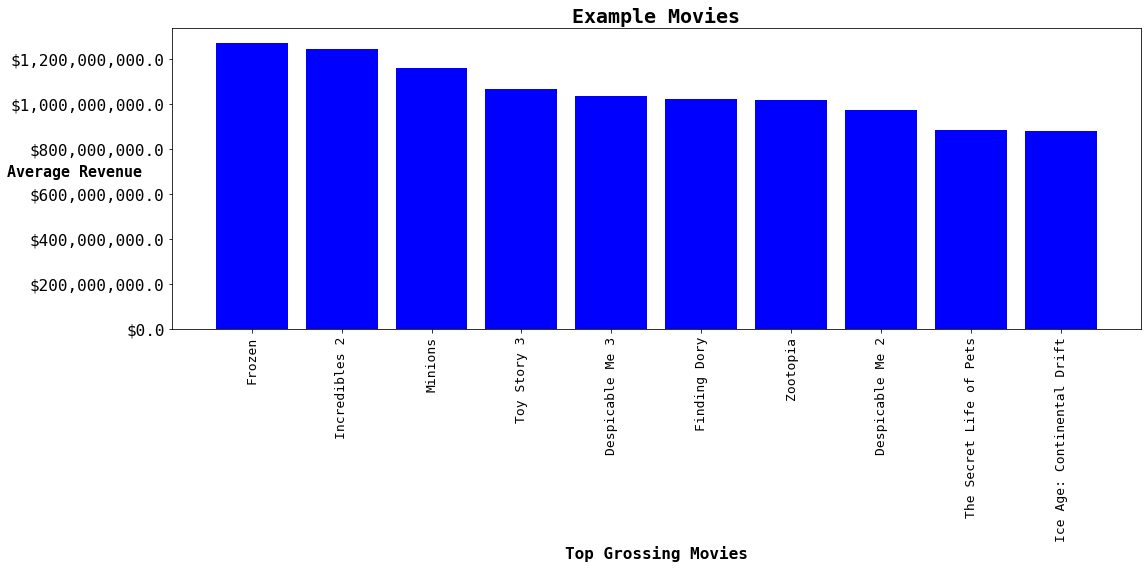

In [391]:
plt.rcParams['font.family'] = 'monospace'

x = recomendation['title'].head(10)
height= recomendation['worldwide_gross'].head(10)
fig, ax = plt.subplots(figsize=(16,8))



ax.bar(x=x, height=height, color= 'blue')


plt.title("Example Movies", fontsize=20, loc='center', weight='bold')
ax.set_xlabel('Top Grossing Movies', fontsize=16, weight='bold')

ax.set_ylabel('Average Revenue', fontsize=15, rotation=360, weight='bold', loc='center')
ax.ticklabel_format(style='plain', axis='y')

ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', labelsize=13, rotation = 90)

ax.yaxis.set_label_coords(-0.1, 0.5)
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))

plt.tight_layout()
plt.savefig('example_reccomendations.jpg', dpi=400)

In [388]:
recomendation.head(10)

,title,movie_id,production_budget,worldwide_gross,month,genres
0,Frozen,tt2294629,150000000.0,1.272470e+09,11,"Adventure,Animation,Comedy"
1,Incredibles 2,tt3606756,200000000.0,1.242521e+09,6,"Action,Adventure,Animation"
2,Minions,tt2293640,74000000.0,1.160336e+09,7,"Adventure,Animation,Comedy"
3,Toy Story 3,tt0435761,200000000.0,1.068880e+09,6,"Adventure,Animation,Comedy"
4,Despicable Me 3,tt3469046,75000000.0,1.034728e+09,6,"Adventure,Animation,Comedy"
5,Finding Dory,tt2277860,200000000.0,1.021215e+09,6,"Adventure,Animation,Comedy"
6,Zootopia,tt2948356,150000000.0,1.019430e+09,3,"Adventure,Animation,Comedy"
7,Despicable Me 2,tt1690953,76000000.0,9.752168e+08,7,"Adventure,Animation,Comedy"
8,The Secret Life of Pets,tt2709768,75000000.0,8.867505e+08,7,"Adventure,Animation,Comedy"
9,Ice Age: Continental Drift,tt1667889,95000000.0,8.797651e+08,7,"Adventure,Animation,Comedy"
